In [1]:
from __future__ import print_function
__author__ = 'acs2w'

import pylab as pl
import seaborn
import numpy as np
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Chi-Squared Distribution

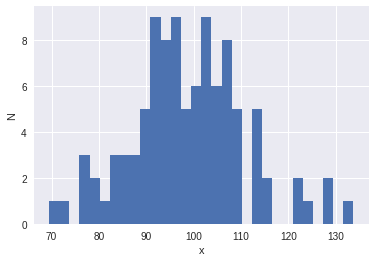

In [2]:
distributions = ['chisq']
mymean = 100
df = mymean
md = {}
md ['chisq'] = np.random.chisquare(df, size=100)
pl.hist(md['chisq'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

In [3]:
print ("Chisq mean: %.2f, standard deviation: %.2f"\
       %(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 98.87, standard deviation: 12.09


In [4]:
mysize = (2000 / (np.array(range(1,100)))).astype(int)
print(mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


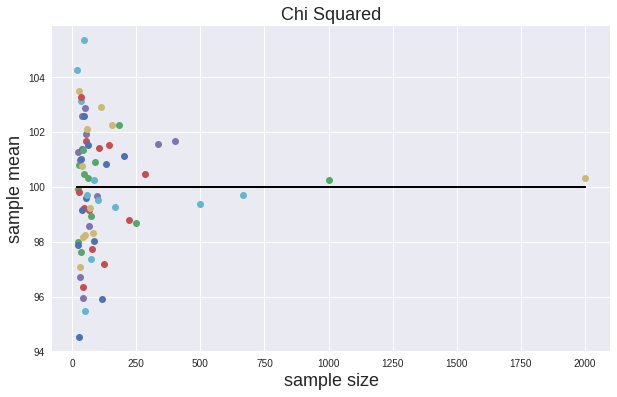

In [5]:
md['chisq'] = {}

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size=n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi Squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df],'k')

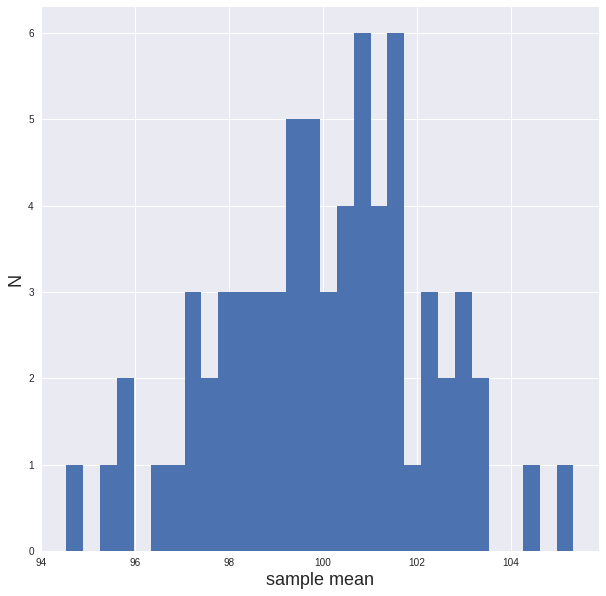

In [6]:
chimeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(chimeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

# Normal Distribution

Normal mean: 99.92, standard deviation: 0.99


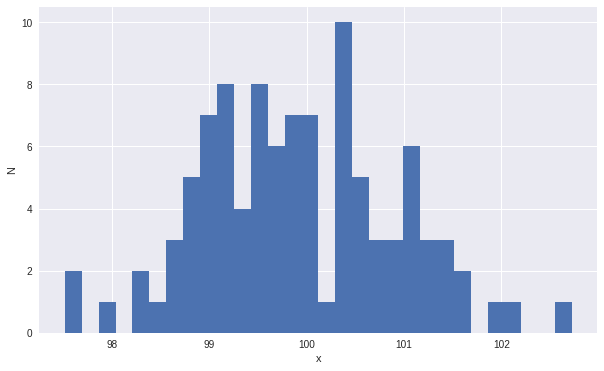

In [7]:
distributions.append('normal')
mymean = 100
loc = mymean

md ['normal'] = np.random.normal(loc, size=100)
pl.hist(md['normal'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Normal mean: %.2f, standard deviation: %.2f"\
       %(md['normal'].mean(), md['normal'].std()))

In [8]:
mysize = 1000 / (np.array(range(1, 100) + [10]))
print (mysize, mysize.shape)

[1000  500  333  250  200  166  142  125  111  100   90   83   76   71   66
   62   58   55   52   50   47   45   43   41   40   38   37   35   34   33
   32   31   30   29   28   27   27   26   25   25   24   23   23   22   22
   21   21   20   20   20   19   19   18   18   18   17   17   17   16   16
   16   16   15   15   15   15   14   14   14   14   14   13   13   13   13
   13   12   12   12   12   12   12   12   11   11   11   11   11   11   11
   10   10   10   10   10   10   10   10   10  100] (100,)


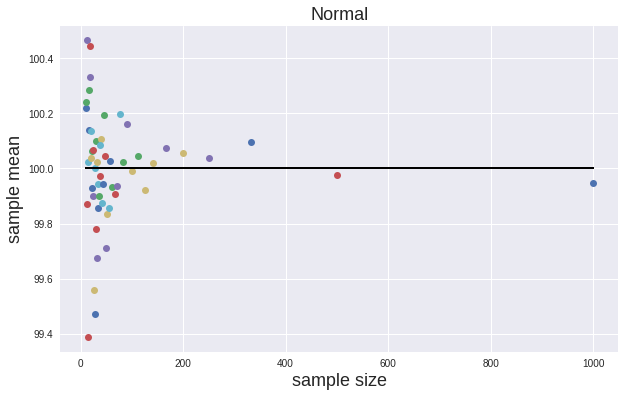

In [9]:
md['normal'] = {}

for n in mysize:
    md['normal'][n] = np.random.normal(loc, size=n)

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        axchisq_mu_n.plot(nn, md['normal']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[loc,loc],'k')

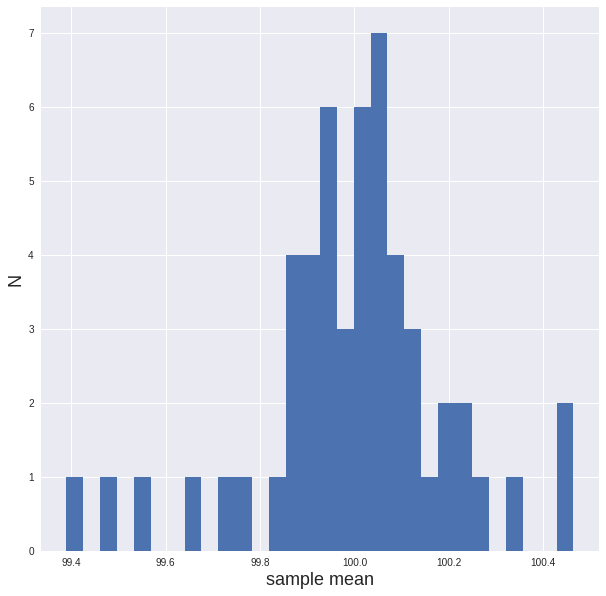

In [10]:
normmeans = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(normmeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

# Poisson Distribution

Poisson mean: 99.95, standard deviation: 9.51


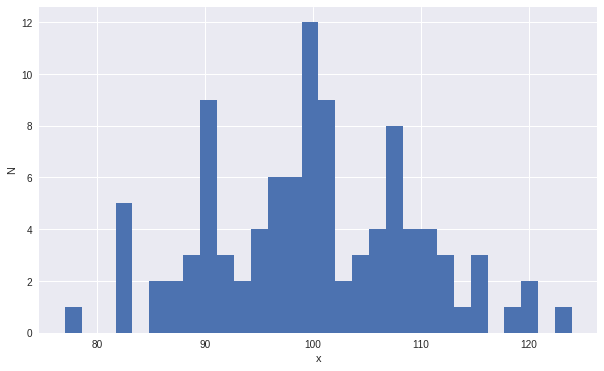

In [11]:
distributions.append('poisson')
mymean = 100
lam = mymean

md ['poisson'] = np.random.poisson(lam, size=100)
pl.hist(md['poisson'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Poisson mean: %.2f, standard deviation: %.2f"\
       %(md['poisson'].mean(), md['poisson'].std()))

In [12]:
mysize = (np.random.rand(100) * 1000).astype(int)

[ 56 462 697 367  65 914 146 922 231 895 293 335 938 643  54 103 944 856
 896 210 454 799  94 859 479 521 807  45 402 154 729 322 313 662 125 706
 284 602 183 721 835 339 712 903 688 958 344 470 483 560 465 827 936 750
 722 515 599 713 876  95 962 675 665 663 572 794 455 335 474 937 121   5
 345 726 653 576 796 504 509 221 240 332  10 762 603  78 160 342 737  71
 998 588 353 247 434 983  33  34 113  66] (100,)


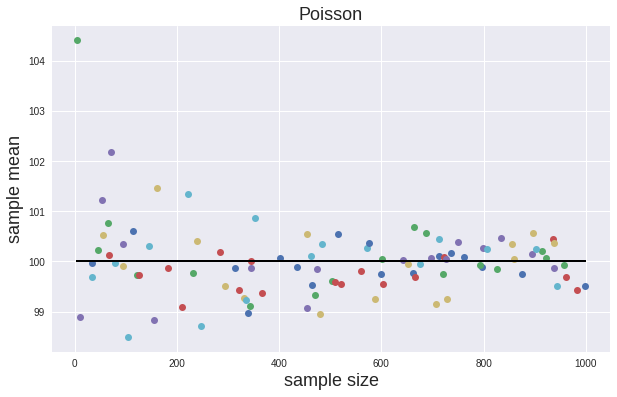

In [13]:
md['poisson'] = {}

for n in mysize:
    md['poisson'][n] = np.random.poisson(lam, size=n)

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[lam,lam],'k')

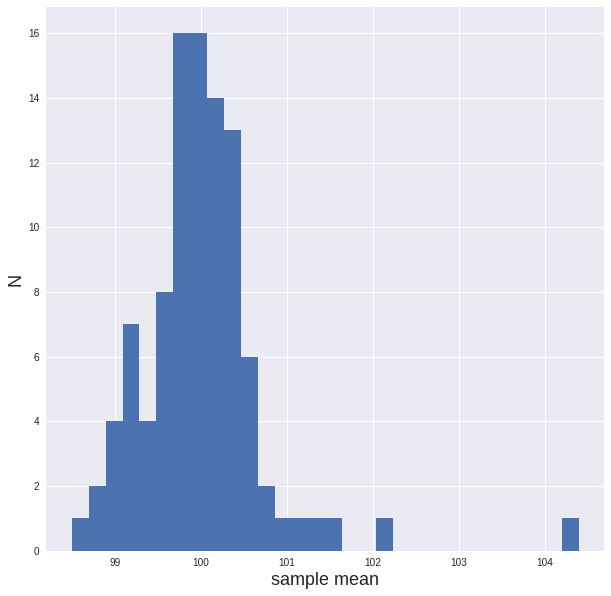

In [14]:
poismeans = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(poismeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

# Binomial Distribution

Binomial mean: 100.51, standard deviation: 6.61


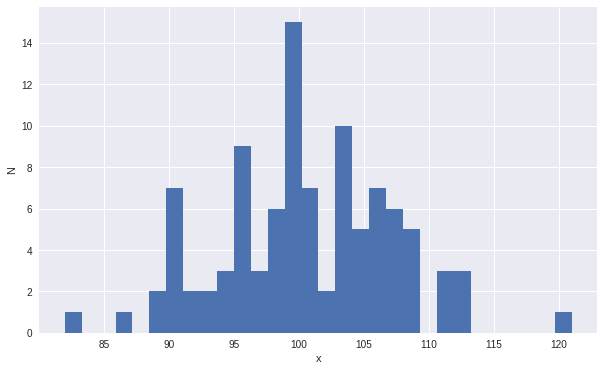

In [78]:
distributions.append('binomial')
mymean = 100
num, p = 200, .5

md ['binomial'] = np.random.binomial(num, p, size=100)
pl.hist(md['binomial'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Binomial mean: %.2f, standard deviation: %.2f"\
       %(md['binomial'].mean(), md['binomial'].std()))

In [16]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[480 629 777 141 531 139 159 837  52 781 711  38 437 501 885 325 812 399
 988 325 803 687 278 233 726 471   7 601 142 183 563 316 330 938 354  50
  85 828 765 597 893 654 636 441  21 698 844  78 161 949 643 104 346 746
 303 427 752 327 359 231 788 934   3 473 996  64 174  69 752 874 848 401
 407 394 200 834 561 582 702 435 650 873 994  56  53 240 406 583  40 748
 577 114 805 335 467 432 214  38 815 468] (100,)


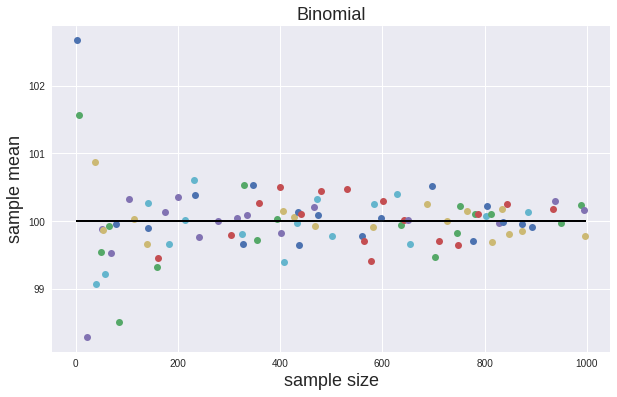

In [17]:
md['binomial'] = {}

for n in mysize:
    md['binomial'][n] = np.random.binomial(num, p, size=n)

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[num*p,num*p],'k')

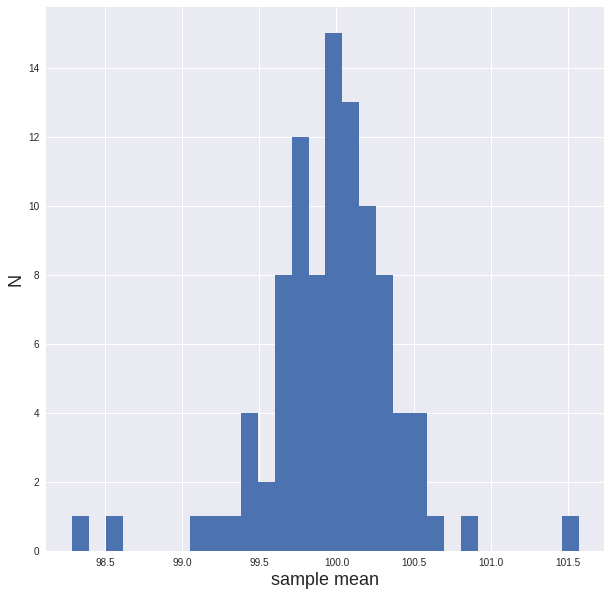

In [18]:
bimeans = list(md['binomial']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(bimeans[1:], bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

# Laplace Distribution

Laplace mean: 100.01, standard deviation: 1.52


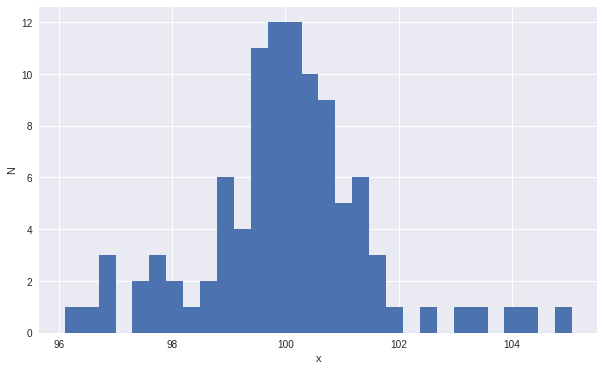

In [27]:
distributions.append('laplace')
mymean = 100
loc = mymean

md ['laplace'] = np.random.laplace(loc, size=100)
pl.hist(md['laplace'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Laplace mean: %.2f, standard deviation: %.2f"\
       %(md['laplace'].mean(), md['laplace'].std()))

In [28]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[621 305 338 179 668 245 304 984  56 294 663 954 609 172 201 253 452 670
 912 813 544 295 857 372 906 234 189  96 953  50 425 665 297 871 477 443
 225 201 425 202 250 636 720 118 726 199 116 136 390 117 376 218 641 631
 249 344  97 281 334 821 294 744 498  92  47 390 230  55 867 809 267 110
 329 722 330 687 212 325 276 178 166 332 738  22 869  51 886 143 789 758
  90  52 562 830 600 385 925 373  62 175] (100,)


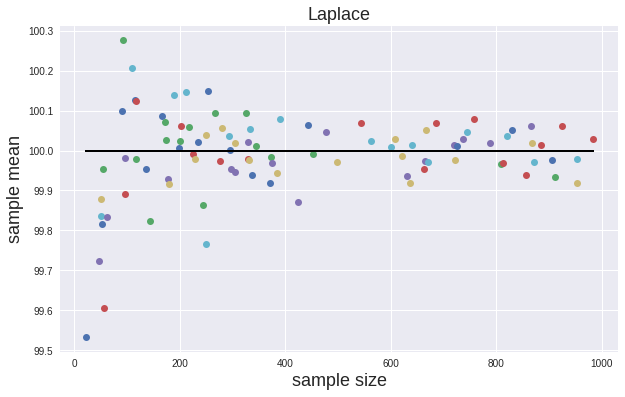

In [29]:
md['laplace'] = {}

for n in mysize:
    md['laplace'][n] = np.random.laplace(loc, size=n)

md['laplace']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        axchisq_mu_n.plot(nn, md['laplace']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Laplace', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[num*p,num*p],'k')

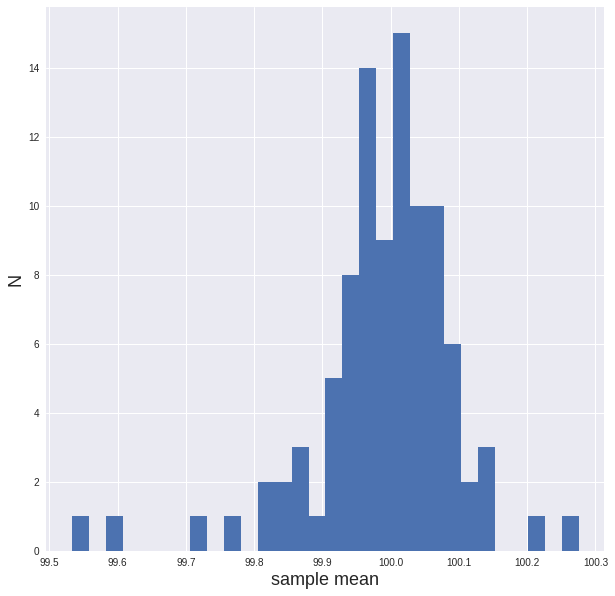

In [30]:
lameans = list(md['laplace']['means'].values()) 
pl.figure(figsize=(10, 10))
pl.hist(lameans, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

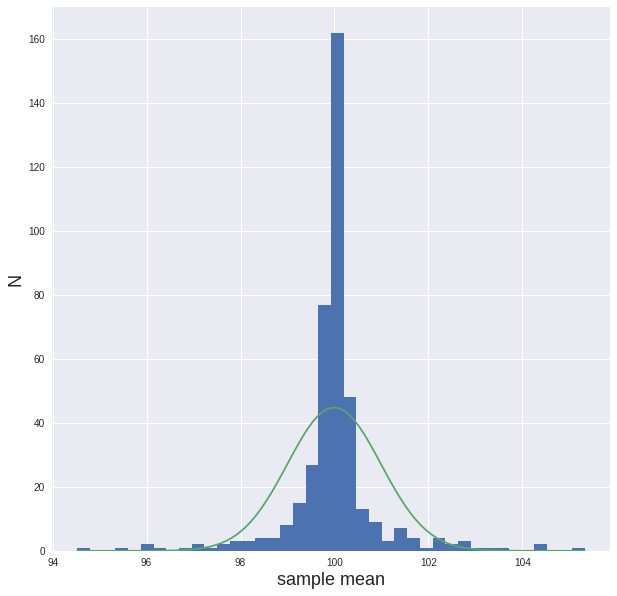

In [74]:
import matplotlib.mlab as mlab
allmeans = []
[allmeans.append(i) for i in chimeans]
[allmeans.append(i) for i in normmeans]
[allmeans.append(i) for i in poismeans]
[allmeans.append(i) for i in bimeans]
[allmeans.append(i) for i in lameans]

pl.figure(figsize=(10, 10))
result = pl.hist(allmeans, bins=40)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

mu = np.mean(allmeans)
variance = np.var(allmeans)
sigma = np.sqrt(variance)
x = np.linspace(min(allmeans), max(allmeans), 100)
dx = result[1][1]-result[1][0]
scale = len(allmeans)*dx
gauss = pl.plot(x, mlab.normpdf(x, mu, sigma)*scale)